# Math 210 Project 2: Minimum Wage in Canada 


Minimum wage in general has always been an big issue for the government. The recent elcection of Justin Trudeau will make minimum wage again a hot topic in Canada for the first few years of his election. Since his elction, he has made several comments on minimum wage such as supporting an NDP plan for raising federal minimum wage to $15 CAD dollars. The project will focus on the anaylsis of minimum wage by looking at the Consumer Price Index(CPI) and the Real GDP per capita. We will look at the relationships between them and see if they may affect each other. 

Topics addressed:
1. The relationship between CPI and minimum wage(evaluated through percentage changes)
3. The real minimum wage calculated using CPI
4. GDP per capita and minimum wage
4. The prediction of future minimum wage

## Executive Summary

1. Minimum wage is closely related to the consumer price index. The relationship is seen through analyzing both of the percentage change graphs. However when CPI drops, which may be the result of economic issues does not affect the minimum wage. Similar to the CPI,the GDP per capita and minimum wage both slopes positively. But the minimum wage does not follow the economic cycle. This observed by considering the 2008 financial crises and the 2014 excessive price fall in petrolium, which resulted in large decreases in real GDP per capita. The large decrease did not affect the upward sloping minimum wage.

2. The minimum wage has been undervalued over the recent years. After adjusting inflation rates on the minimum wage we can see how much the minimum wage is worth. The largest value of the minimum was in the 1990s and followed by an equal value for a 10 year span. Minimum wage started to decline in value after the 2000s.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline

In [2]:
d1 = pd.read_csv('20140926-01-historicalminimumwageratesincanada-ENG.csv', index_col = 1, encoding = 'latin')

In [3]:
d1[:3]

,Province and Territory,Minimum Wage
Date,,
1-Sep-13,Alberta,9.95
1-Sep-12,Alberta,9.75
1-Sep-11,Alberta,9.40


In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 1-Sep-13 to 1-Jan-65
Data columns (total 2 columns):
Province and Territory    398 non-null object
Minimum Wage              398 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


### Data Information: 

**Provinces and Territory**: The ten provinces are Alberta, British Columbia, Manitoba, New Brunswick, Newfoundland and Labrador, Nova Scotia, Ontario, Prince Edward Island, Quebec, and Saskatchewan.

**Minimum Wage**: The lowest wage permitted by law. 

The data includes 2 rows and 399 rows. 
The two columns are 'Province and Territories' and 'Minimum Wage'.

Consumer Price Index (CPI) from 1965 - 2015

In [5]:
d2 = pd.read_csv('cpi.csv', index_col = 0)

In [6]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1965 to 2015
Data columns (total 2 columns):
CPI                          51 non-null float64
Change from previous year    51 non-null float64
dtypes: float64(2)
memory usage: 1.2 KB


We will be focusing on the Minimum wage of British Columbia
This set of data has been cleaned and made to a different format for easier use.

In [7]:
d1[d1['Province and Territory'] == 'British Columbia']['Minimum Wage']

Date
2012    10.25
2011     9.50
2001     8.00
2000     7.60
1998     7.15
1995     7.00
1993     6.00
1992     5.50
1990     5.00
1989     4.75
1988     4.50
1980     3.65
1976     3.00
1975     2.75
1974     2.50
1973     2.25
1972     2.00
1970     1.50
1967     1.25
1966     1.00
Name: Minimum Wage, dtype: float64

### Data Information:

**CPI**: The consumer price index is an indicator for consumer price change used to measure price level and inflation. (In Canadian Dollars)

We will be not be using the column: Change from previous year.

In [8]:
d2[:10]

,CPI,Change from previous year
Years,,
1965,16.8,2.4
1966,17.5,4.2
1967,18.1,3.4
1968,18.8,3.9
1969,19.7,4.8
1970,20.3,3.0
1971,20.9,3.0
1972,21.9,4.8
1973,23.6,7.8


We will be focusing on the specific CPI table for British Columbia from 1979-2015

In [9]:
d3 = pd.read_csv('cpibc.csv', index_col = 0)
d3[:5]

,CPI
Year,
1979,41.5
1980,45.4
1981,51.8
1982,57.3
1983,60.4


## Plotting the Minimum Wage in each Province

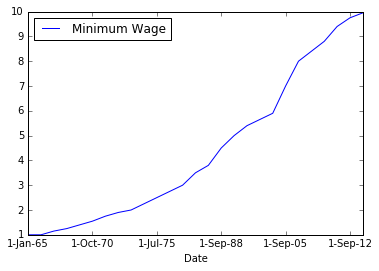

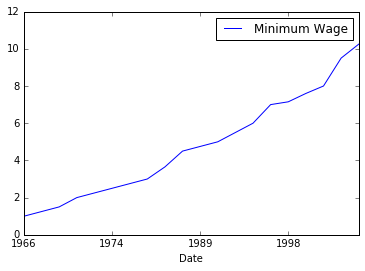

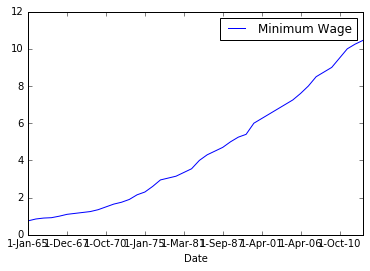

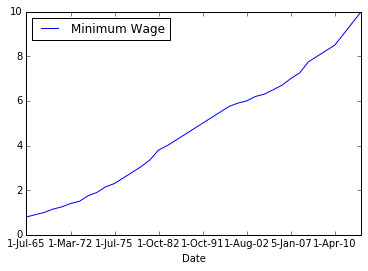

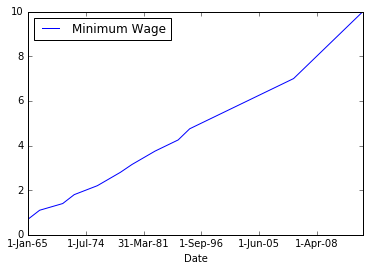

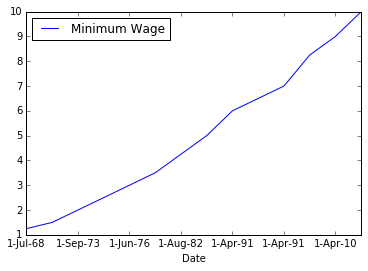

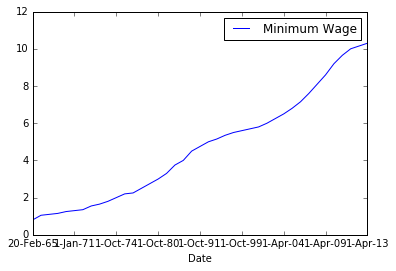

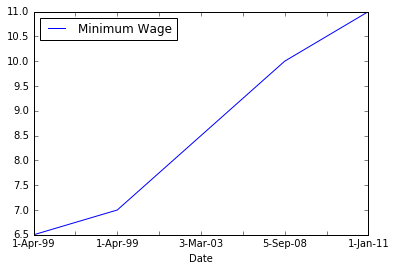

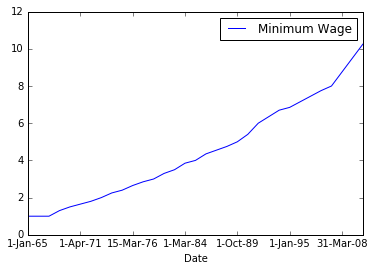

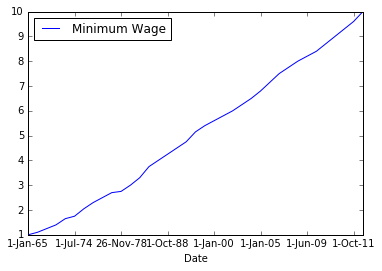

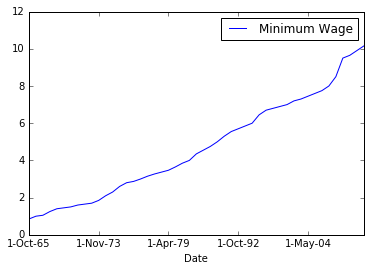

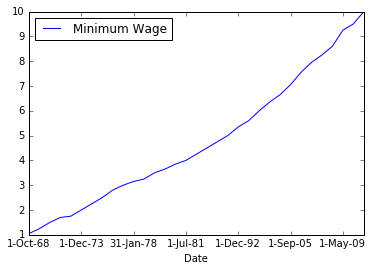

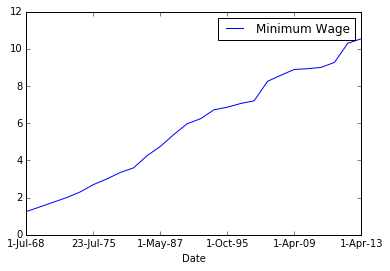

In [10]:
d1 = d1.iloc[::-1]
d1.groupby('Province and Territory').plot(stacked = True)
plt.show()

The graphs of minimum wage of each province shows similarity in growth and fluctuation. 

# Comparison of Percentage change in the CPI and Minimum Wage

Comparing the percentage change in minimum wage and CPI. The percentage change in CPI is also the inflation rate. 

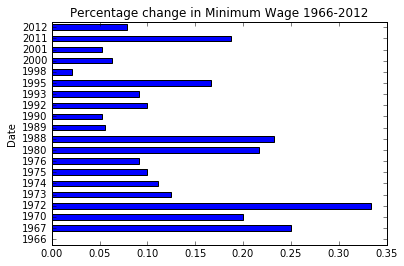

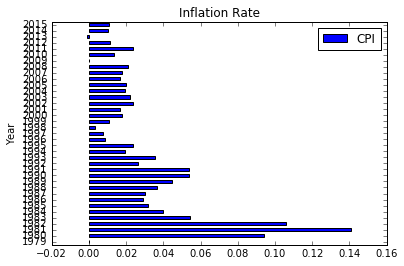

In [11]:
d1[d1['Province and Territory'] == 'British Columbia']['Minimum Wage'].pct_change().plot.barh(stacked = True)
plt.title('Percentage change in Minimum Wage 1966-2012')
#The percentage change in CPI is also the inflation rate
d3.pct_change().plot.barh(stacked = True)
plt.title('Inflation Rate')

We can also use the covariance of the two variables to see there relationship.

**Note**: there isn't a big difference in the change of percentage from years 2005 and after, we will not consider these dates in the covariance calculation. Also becuase we have incomplete data in our minimum wage dataset(missing a few years from 2002-2013). 

To calculate the covariance we would need to import a new set of CPI of British Columbia data. Some cleaning was done so the dates would match. 

We will use `np.vstack` and operate on numpy arrays because pd.dataframe.cov() gives a `nan` value. 

In [12]:
d4_selected_years = pd.read_csv('cpibc-Copy1.csv', index_col = 0 )
x = d4_selected_years

In [13]:
y = d1[d1['Province and Territory'] == 'British Columbia']['Minimum Wage'][8:]

In [14]:
x = np.vstack((x['CPI'][1:], y[1:]))
np.cov(x)

array([[ 231.36690909,   28.69040909],
       [  28.69040909,    3.64790909]])

In this situation we see that the covariance is postivie implying that the CPI and Minimum wage moves together. 

We can also see from the two graphs that the annual inflation rate (Percentage change of CPI) is similar to the percentage change in the minimum wage. 

This tells us that the Minimum wage is adjusted with the CPI and that the errors between these two graphs may be from other variables that affect the minimum wage. 

## Calculating the real minimum wage using the inflation calculated from CPI

We will evaulate the real minimum wage by applying inflation on top of the minimum wage of British Columbia.

In [15]:
x = x[0]
for i in range(len(x)):
    l = []
    #formula for estimating real value
    v = y[i]/(x[i]/100)
    l.append(v)
    print(l)

[5.1264044943820215]
[6.0483870967741931]
[6.0586734693877551]
[5.8962264150943398]
[6.2642369020501141]
[6.5502183406113543]
[7.4946466809421839]
[7.4401664932362133]
[7.7789150460593648]
[6.866952789699571]
[8.064516129032258]


We calculated the values for minimum wage after inflation for each year. Values are taken and inserted into another numpy array for easier visualization and calculation. 

In [16]:
x = np.arange(0,11)
y = [5.1264044943820215, 6.0483870967741931, 6.0586734693877551, 5.8962264150943398,
     6.2642369020501141, 6.5502183406113543, 7.4946466809421839, 7.4401664932362133, 7.7789150460593648, 6.866952789699571, 8.064516129032258]

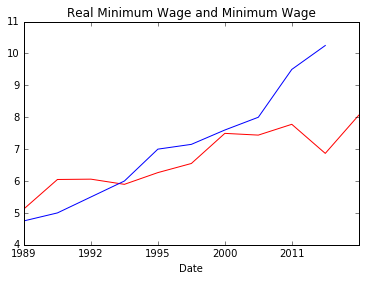

In [17]:
plt.plot(x,y, 'red')
d1[d1['Province and Territory'] == 'British Columbia']['Minimum Wage'][10:].plot()
plt.title('Real Minimum Wage and Minimum Wage')

The red lines would be the minimum wage after inflation.

We can conclude that the actual value of the minimum wage before 2000 was above or at least equal its actual value. However from 2000 to 2012 the minimum wage of canada is much lower than the actual value. However this is not an accurate calculation because of lack of larger data. 

# Relationship between GDP per capita and minimum wage

The relationship will be analyzed using the smaller dataset on British Columbia minimum wage and CPI to the real GDP percapita of Canada. Generalizing the minimum wage of only British Columbia is extreme, but the trend of minimum wage is similar to the other provinces and territories. It is also because the lack of data on Canada's minimum wage as a whole throughout the years. 


The GDP per capita set of data is the only set of data in U.S. Dollars. This will not affect the analysis since we are looking at the trend of the data.

In [18]:
d5 = pd.read_csv('gdppc.csv', index_col = 0)

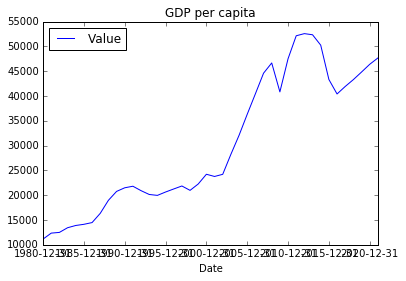

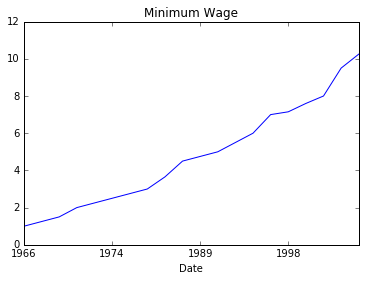

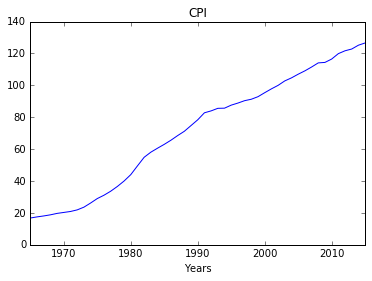

In [19]:
#GDP per capita graph
d5.iloc[::-1].plot()
plt.title('GDP per capita')
plt.subplots()

#Minimum Wage Graph
d1[d1['Province and Territory'] == 'British Columbia']['Minimum Wage'].plot(stacked = True)
plt.title('Minimum Wage')
plt.subplots()
#CPI graph
d2['CPI'].plot()
plt.title('CPI')
plt.show()

We can see that these three graphs all have postive slopes and only the GDP per capita has a major fluctuation 2008-2009 and also 2013-2016. The GDP per capita drop in 2008-2009 is because of the financial crisis that started in 2008. However there isn't a major decrease in minimum wage. This tells us that the minimum wage does not fluctuate with the GDP per capita further assuming that the majority of the money from the GDP does not come from the people earning minimum wages. 

The second drop of GDP per capita started in 2013, there are many reasons behind this but the major assumption is to be the intensive drop of petrolium prices in 2014. Since one of Canada's main industry is petroleum. 

The GDP per capita is also known for the indicator of standard of living. This also may imply that minimum wage can not be measured from the average canadian's expenditure. 

# Predictions of Future Minimum Wage

Linear regression analysis will be operated on the Minimum Wage set of data


Data set $$\left( {y_i, x_{i1},...} \right)^n_{i=1}$$
written in vector form:
$$y_i = \beta x_i + ...+ \beta_p x_{ip}+\epsilon = X^{\bf{T}}_{i} + \epsilon_i$$
$\bf{T}$ denotes transpose
$$i = 1,...,n,$$
$$\bf{y}= \bf{x}{\beta} + \epsilon$$

Source: [Wikpedia](https://en.wikipedia.org/wiki/Linear_regression)

We will use this model to make assumptions about the future Minimum wage. 

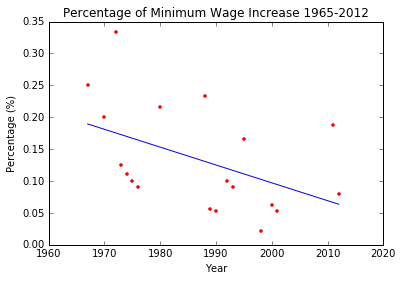

In [20]:
#used parts of Professor Walls code from example project 2
a = d1[d1['Province and Territory'] == 'British Columbia']['Minimum Wage'].pct_change()[1:]
b = a.index.values
b = list(map(int,b))
b = np.asarray(b)
X = np.array([np.ones(19), b])
X = np.matrix(X).T
Y = a.values
Y = np.matrix(Y).T
A = (X.T * X)**(-1) * X.T * Y
x = b
y = A[0,0] + A[1,0]*x
plt.plot(x,y,X[:,1],Y,'r.')
plt.xlabel('Year'), plt.ylabel('Percentage (%)')
plt.title('Percentage of Minimum Wage Increase 1965-2012')
plt.show()

The percentage increase of minimum wage each year is not stable and does not follow the linear model. It would be not accurate to predict using this model. The linear model may work for this set of data if it is recorded for a longer period; a trend may appear. 